### PHASE 5 CAPSTONE PROJECT
### Group 6
1. **Tatiana Celine**
2. **Kamal Ali**
3. **William Muthama**
4. **Gilead Gad**
5. **Simon Muema**
6. **Graffin Kiprotich**

GitHub Repository: https://github.com/Tatianaceline/Predictive-Model-for-Patient-Readmission-Risk

# PREDICTING PATIENT READMISSION RISK

This project aims to develop a model that can predict patient readmission risk based on patient data. Accurately identifying high-risk patients can help medical providers improve patient care and reduce costs associated with frequent readmissions.

## Project Outline
1. **Business Understanding**
2. **Data Understanding**
3. **Data Import and Library Setup**
4. **Data Cleaning**
5. **Exploratory Data Analysis (EDA)**
6. **Further Data Cleaning Based on EDA**
7. **Modelling and Evaluation**
8. **Predictive Modelling and Evaluation**
9. **Conclusion**

## 1. Business Understanding
Hospital readmission rates are a significant concern in healthcare management due to their impact on both patient well-being and hospital costs. Our goal is to identify key factors influencing readmission risk and build a predictive model that flags high-risk patients.

**Key Questions:**
- Which patient characteristics correlate with a higher readmission risk?
- How does the length of hospital stay impact readmission likelihood?
- Can we develop an actionable model to predict readmissions?

The dataset includes patient demographics, hospital visits, and medical metrics, allowing us to explore patterns associated with readmissions.

## 2. Data Understanding
The data used in this project contains patient information including demographics, hospital metrics, and readmission indicators. We will focus on the following columns:

- **patient_nbr**: Unique patient identifier.
- **gender**: Patient gender.
- **age**: Age group of the patient.
- **weight**: Patient weight (if recorded).
- **time_in_hospital**: Length of stay in days.
- **medical_specialty**: Primary care specialty.
- **num_lab_procedures**: Number of lab tests performed during the hospital stay.
- **num_procedures**: Number of procedures during the stay.
- **num_medications**: Number of medications administered.
- **number_outpatient**: Outpatient visits.
- **number_emergency**: Emergency visits.
- **number_inpatient**: Previous inpatient visits.
- **number_diagnoses**: Number of diagnoses.
- **diabetesMed**: Whether diabetes medication was prescribed.
- **readmitted**: Indicator if the patient was readmitted (target variable).

## 3. Importing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neural_network import MLPClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Load the data
file_path = 'synthetic_diabetic_data.csv'
data = pd.read_csv(file_path)

# Display the first 5 rows
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,429727004,161137462,Other,Female,[70-80),[125-150),5,10,25,5,...,No,No,No,Steady,Steady,Steady,No,Ch,No,>30
4,24882254,178987224,Other,Male,[60-70),[50-75),2,25,18,12,...,No,Steady,Up,No,No,No,Steady,No,Yes,>30


## 4. Data Cleaning

### 1. Dropping unlisted columns

In [3]:
# Select only the specified columns
columns_needed = [
    'patient_nbr', 'gender', 'age', 'weight', 'time_in_hospital',
    'medical_specialty', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'diabetesMed', 'readmitted'
]
data = data[columns_needed]

### 2. Checking for missing values

In [4]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 patient_nbr           0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
diabetesMed           0
readmitted            0
dtype: int64


### 3. Handling missing values

In [5]:
# Dropping rows where 'weight' is missing as a potential option
data.dropna(subset=['weight'], inplace=True)
data.head()

,patient_nbr,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
0,8222157,Female,[0-10),?,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,No,NO
1,55629189,Female,[10-20),?,3,?,59,0,18,0,0,0,9,Yes,>30
2,86047875,Female,[20-30),?,2,?,11,5,13,2,0,1,6,Yes,NO
3,161137462,Female,[70-80),[125-150),5,InfectiousDiseases,66,2,9,33,71,18,1,No,>30
4,178987224,Male,[60-70),[50-75),12,DCPTEAM,83,0,54,37,14,1,6,Yes,>30


In [6]:
# Dropping rows with '?' in the column weight
data = data[(data['weight'] != '?')]

# Display the first few rows to confirm the changes
data.head()

,patient_nbr,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
3,161137462,Female,[70-80),[125-150),5,InfectiousDiseases,66,2,9,33,71,18,1,No,>30
4,178987224,Male,[60-70),[50-75),12,DCPTEAM,83,0,54,37,14,1,6,Yes,>30
5,155688693,Unknown/Invalid,[30-40),>200,11,Radiology,110,3,4,38,0,10,8,No,>30
6,148640105,Male,[30-40),[75-100),14,Psychiatry,127,2,62,25,47,20,11,Yes,<30
7,179391750,Female,[20-30),[0-25),13,Psychology,114,3,21,18,37,21,11,No,NO


In [7]:
# Dropping rows with '?' in the column medical_speciality
data = data[(data['medical_specialty'] != '?')]

# Display the first few rows to confirm the changes
data.head()

,patient_nbr,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
3,161137462,Female,[70-80),[125-150),5,InfectiousDiseases,66,2,9,33,71,18,1,No,>30
4,178987224,Male,[60-70),[50-75),12,DCPTEAM,83,0,54,37,14,1,6,Yes,>30
5,155688693,Unknown/Invalid,[30-40),>200,11,Radiology,110,3,4,38,0,10,8,No,>30
6,148640105,Male,[30-40),[75-100),14,Psychiatry,127,2,62,25,47,20,11,Yes,<30
7,179391750,Female,[20-30),[0-25),13,Psychology,114,3,21,18,37,21,11,No,NO


### 4. Handling duplicates

Checking for duplicates

In [8]:
# Checking for duplicates in each column
for column in data.columns:
    duplicates = data[column].duplicated().sum()
    print(f"Column '{column}' has {duplicates} duplicate values.")

Column 'patient_nbr' has 1 duplicate values.
Column 'gender' has 8851 duplicate values.
Column 'age' has 8844 duplicate values.
Column 'weight' has 8845 duplicate values.
Column 'time_in_hospital' has 8840 duplicate values.
Column 'medical_specialty' has 8782 duplicate values.
Column 'num_lab_procedures' has 8722 duplicate values.
Column 'num_procedures' has 8847 duplicate values.
Column 'num_medications' has 8773 duplicate values.
Column 'number_outpatient' has 8811 duplicate values.
Column 'number_emergency' has 8777 duplicate values.
Column 'number_inpatient' has 8832 duplicate values.
Column 'number_diagnoses' has 8838 duplicate values.
Column 'diabetesMed' has 8852 duplicate values.
Column 'readmitted' has 8851 duplicate values.


### Interpretation
From this, we can see that only the column 'patient_nbr' which is a unique identifier for each patient has 1 duplicate value that needs to be dropped. For the rest of the columns, the values are not unique identifiers and hence remain okay as duplicates.

In [9]:
# Removing duplicates from the column 'patient_nbr'
data = data.drop_duplicates(subset=['patient_nbr'], keep='first')

In [10]:
# Checking for duplicates in each column to confirm the changes
for column in data.columns:
    duplicates = data[column].duplicated().sum()
    print(f"Column '{column}' has {duplicates} duplicate values.")

Column 'patient_nbr' has 0 duplicate values.
Column 'gender' has 8850 duplicate values.
Column 'age' has 8843 duplicate values.
Column 'weight' has 8844 duplicate values.
Column 'time_in_hospital' has 8839 duplicate values.
Column 'medical_specialty' has 8781 duplicate values.
Column 'num_lab_procedures' has 8721 duplicate values.
Column 'num_procedures' has 8846 duplicate values.
Column 'num_medications' has 8772 duplicate values.
Column 'number_outpatient' has 8810 duplicate values.
Column 'number_emergency' has 8776 duplicate values.
Column 'number_inpatient' has 8831 duplicate values.
Column 'number_diagnoses' has 8837 duplicate values.
Column 'diabetesMed' has 8851 duplicate values.
Column 'readmitted' has 8850 duplicate values.


## 5. Exploratory Data Analysis (EDA)
In this section, we will explore the data to understand the distributions and relationships between variables. Visualizations will help identify patterns and outliers, as well as provide insights into factors associated with readmissions.


In [11]:
# Summary statistics
data.describe()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,8.853000e+03,8853.000000,8853.000000,8853.000000,8853.000000,8853.000000,8853.000000,8853.000000,8853.000000
mean,9.442742e+07,7.534508,66.791596,3.031402,41.333107,21.043375,38.245679,10.517678,8.580933
std,5.472411e+07,4.024309,37.995975,1.997379,23.277760,12.415959,22.254923,6.316213,4.568172
min,3.750500e+04,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,4.702353e+07,4.000000,34.000000,1.000000,21.000000,10.000000,19.000000,5.000000,5.000000
50%,9.449942e+07,8.000000,67.000000,3.000000,41.000000,21.000000,39.000000,11.000000,9.000000
75%,1.422599e+08,11.000000,99.000000,5.000000,61.000000,32.000000,58.000000,16.000000,13.000000
max,1.894782e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### Age Group Distribution
This plot shows the distribution of patients across different age groups. By visualizing the counts for each age group, we can identify the age ranges that are more prevalent in the dataset. This information is essential because age can be a factor in readmission risk. Knowing which age groups have the highest or lowest representation will guide our analysis, especially if age impacts readmission rates.

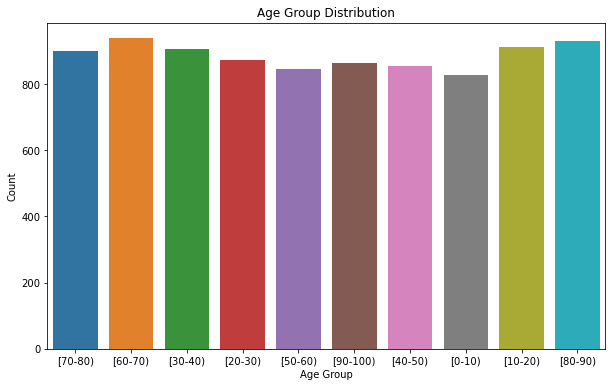

In [12]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Readmission rates by age group
This plot uses the `age` column on the x-axis and the count of patients on the y-axis, with a separate bar for each `readmitted` status (e.g., `Yes` or `No`). By visualizing it this way, we can see which age groups are most frequently readmitted compared to those who aren’t, highlighting any age-related trends in readmission rates.

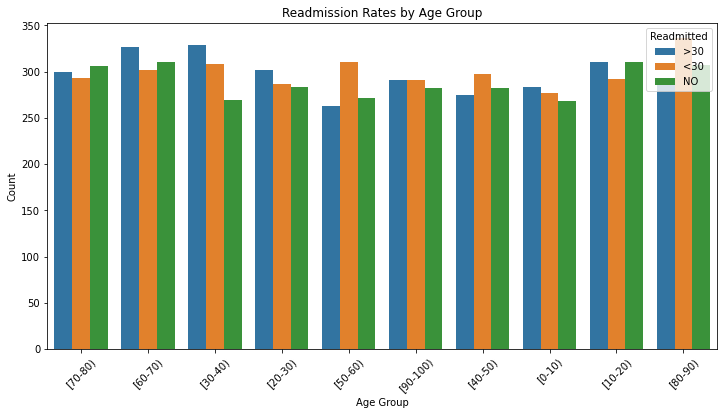

In [13]:
# Plotting readmission rates by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='age', hue='readmitted')
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.xticks(rotation=45)
plt.show()

### Time in Hospital by Readmission Status
Here, we use a box plot to analyze the distribution of `time_in_hospital` for patients with different readmission statuses. This plot provides information on the spread and median of hospital stay lengths, categorized by readmission status. By examining this, we can assess if there is a significant difference in hospital stay duration between readmitted and non-readmitted patients. Longer or shorter stays might correlate with different readmission risks, making this a valuable analysis.

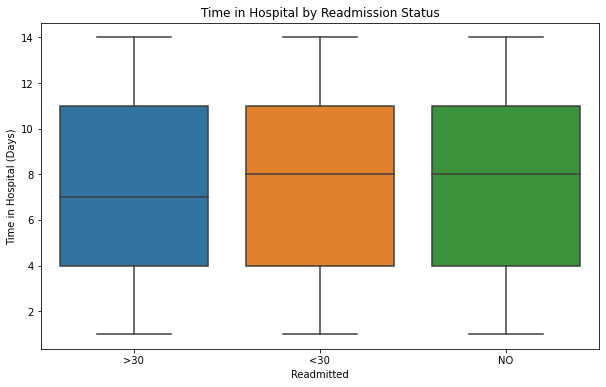

In [14]:
# Time in hospital vs. readmission
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='readmitted', y='time_in_hospital')
plt.title('Time in Hospital by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital (Days)')
plt.show()

### Readmission Rates by Gender
This visualization displays readmission counts for each gender, comparing those who were readmitted against those who were not. By including the `readmitted` status as a hue, we can examine if there is a noticeable difference in readmission rates between genders. This insight can help determine if gender is an influential factor in readmission likelihood, which could have implications for targeted interventions.

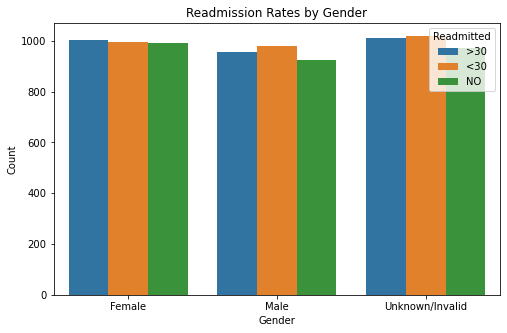

In [15]:
# Readmission rates by gender
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='gender', hue='readmitted')
plt.title('Readmission Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()

### Correlation Heatmap
The heatmap displays correlations between all numerical variables in the dataset, with each cell representing the correlation coefficient between two features. Darker colors indicate stronger correlations, whether positive or negative. This visualization helps in identifying which features are closely related to each other, which may aid in feature selection for the predictive model. Variables with high correlations to `readmitted` or each other can reveal important relationships that influence patient readmission risk.

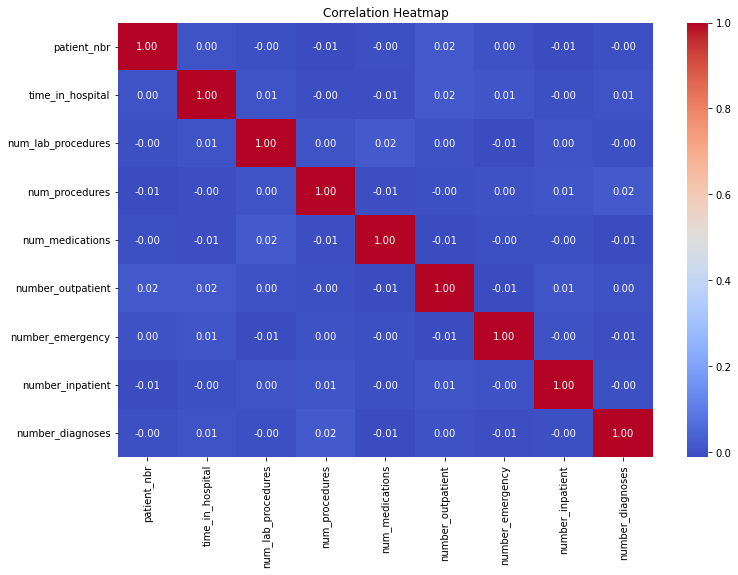

In [16]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))

# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 6. Dropping columns irrelevant to our prediction

In predictive modeling, it's important to select features that directly contribute to the outcome. For this project, we aim to predict patient readmissions, so columns that don't provide relevant information to this outcome—like non-medical information—can be safely dropped. Below, we will justify the removal of several columns that are not expected to affect readmission outcomes based on our exploratory data analysis (EDA).

### Dropping Irrelevant Columns Based on EDA Insights

After completing exploratory data analysis, we found that the `gender` and `age` columns do not significantly impact the readmission prediction outcome:

- **gender**: Analysis showed no strong correlation between patient gender and readmission rates in our dataset.
- **age**: Patient age alone does not provide significant predictive value for readmission. This is likely due to the variability in other health factors that have a more direct impact.

To improve model performance, we will remove these columns from the dataset.

In [17]:
# Dropping 'gender' and 'age' columns based on EDA insights
columns_to_drop = ['gender', 'age']
data = data.drop(columns=columns_to_drop)

print("Dropped columns:", columns_to_drop)

Dropped columns: ['gender', 'age']


## 7. Modeling and Evaluation

Since our goal is to predict patient readmission, we will use unsupervised machine learning techniques to identify patterns that may correlate with readmission.

### Steps:
1. **Feature Scaling**: Normalize features to ensure optimal clustering performance.
2. **Clustering**: Use K-means clustering to form patient groups.
3. **Evaluation**: Assess if clusters are predictive of readmission.

### Step 1: Feature Scaling
To ensure that all features contribute equally to the clustering algorithm, we will apply StandardScaler to normalize the feature values.

In [18]:
# Selecting numerical features for scaling
features_to_scale = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                    'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Combine scaled features with categorical variables
data_scaled = data.copy()
data_scaled[features_to_scale] = scaled_df

# Display the first few rows of the scaled data
data_scaled.head()

,patient_nbr,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
3,161137462,[125-150),1.606700,InfectiousDiseases,1.584689,-0.516407,0.887889,0.318691,0.393388,1.501352,0.529578,No,>30
4,178987224,[50-75),1.358196,DCPTEAM,1.242528,-0.015722,-0.873549,-0.245132,-0.055976,1.659684,0.529578,Yes,>30
5,155688693,>200,-1.375347,Radiology,-1.600039,-0.516407,0.286422,-0.889500,1.606671,-0.715291,-1.002850,No,>30
6,148640105,[75-100),1.109692,Psychiatry,0.610847,-1.017091,-0.315044,1.526881,-1.224323,-1.665281,-1.221768,Yes,<30
7,179391750,[0-25),0.861188,Psychology,-1.257878,-1.517775,1.661203,0.721421,-0.505341,-1.665281,-1.002850,No,NO


- We used **StandardScaler** from `sklearn.preprocessing` to normalize the values of selected numerical features.
- We specified a set of numerical features, such as `time_in_hospital`and `num_lab_procedures`
- The scaled features were combined with the original dataset, replacing the unscaled versions, while categorical variables remain unchanged.

### Step 2: Clustering
We will apply K-means clustering to group patients into clusters based on similar characteristics. The ideal number of clusters (k) will be determined using the elbow method.

C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: Fut

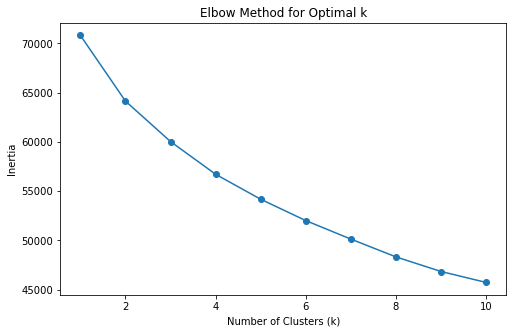

In [19]:
# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Based on the elbow plot, we choose an optimal number of clusters. Let's apply K-means with the chosen number of clusters and assign each patient a cluster label.

In [20]:
# Using an optimal k
optimal_k = 4

# Apply KMeans with optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data_scaled['cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows to verify clustering
data_scaled[['cluster', 'readmitted']].head()

C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,cluster,readmitted
3,2,>30
4,2,>30
5,0,>30
6,1,<30
7,1,NO


### Step 3: Evaluation
We will evaluate the clusters by analyzing the distribution of the target variable (readmitted) across clusters.
If certain clusters show higher readmission rates, we can conclude that clustering captures relevant patterns.

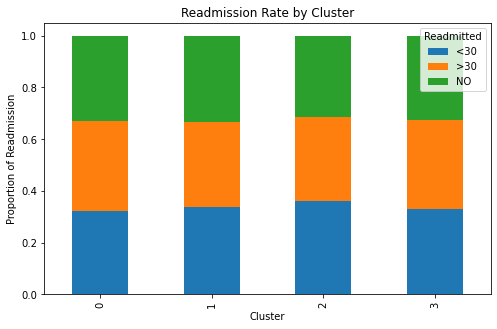

readmitted,<30,>30,NO
cluster,,,
0,0.323905,0.346715,0.329380
1,0.336757,0.327825,0.335418
2,0.361184,0.322889,0.315927
3,0.329567,0.345574,0.324859


In [21]:
# Analyze the relationship between clusters and readmission rate
cluster_analysis = data_scaled.groupby('cluster')['readmitted'].value_counts(normalize=True).unstack()
cluster_analysis.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xlabel('Cluster')
plt.ylabel('Proportion of Readmission')
plt.title('Readmission Rate by Cluster')
plt.legend(title='Readmitted')
plt.show()

# Display the analysis results
cluster_analysis

Each bar represents a cluster, with sections indicating the proportion of patients within that cluster who fall into each readmission category.

Readmission Categories:
1. '<30' : Patients readmitted within 30 days (blue section).
2. '>30' : Patients readmitted after 30 days (orange section).
3. 'NO' : Patients not readmitted (green section).

## 8. Predictive Modeling and Evaluation

In this section, we will develop predictive models to identify patients at high risk of readmission. Our goal is to answer the business questions:
- Which patient characteristics correlate with a higher readmission risk?
- How does the length of hospital stay impact readmission likelihood?
- Can we develop an actionable model to predict readmissions?

### Step 1: Feature Engineering and Selection
We'll begin by selecting key features that may influence readmission risk, such as demographics and hospital metrics.

In [22]:
# Select relevant features for modeling
selected_features = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]

1. **Defining the Target Variable**:
The target variable (`target`) is set to `'readmitted'`, representing the outcome we aim to predict (whether a patient was readmitted or not).

2. **Preparing Feature and Target Datasets**:
We create `X` as the feature set by selecting the relevant columns from `data_scaled`.
`y` is defined as the target variable, extracted from the `data_scaled` DataFrame.

3. **Shape Verification**:
We display the shapes of `X` and `y` to confirm the dimensions, ensuring that they align properly for model training.

In [23]:
# Target variable
target = 'readmitted'

# Prepare feature and target datasets
X = data_scaled[selected_features]
y = data_scaled[target]

# Display the shapes of X and y
X.shape, y.shape

((8853, 8), (8853,))

In [ ]:
# Define X and y based on the scaled data
X_encoded = data_scaled[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Step 2: Data Splitting
We'll split the dataset into training and testing sets to evaluate model performance on unseen data.

In [25]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7082, 8), (1771, 8), (7082,), (1771,))

### Step 3: Model Training

In this step, we train three different models—**Logistic Regression**, **Random Forest**, and **Neural Network**—to predict the likelihood of patient readmission. These models will help identify key patterns in the patient data that correlate with readmission.

In [26]:
print(data.columns)

Index(['patient_nbr', 'weight', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'diabetesMed', 'readmitted'],
      dtype='object')


In [ ]:
# Define features (X) and target (y)
X = data.drop(columns=['readmitted', 'patient_nbr'])
y = data['readmitted']

In this step, we transform categorical variables into a format suitable for machine learning models by using **One-Hot Encoding**.

1. **Initialize OneHotEncoder**:
We initialize `OneHotEncoder` with `sparse=False` to output dense arrays and `handle_unknown='ignore'` to ignore any previously unseen categories in the test data.

2. **Encoding Categorical Variables**:
We apply the encoder to the categorical columns of `X` (identified by `X.select_dtypes(include=['object'])`). This process converts each category in a column into a separate binary (0 or 1) column, known as one-hot encoding.
The result is a new DataFrame, `X_encoded`, containing binary columns for each category, where `1` indicates the presence of a category, and `0` indicates its absence.

3. **Setting Column Names**:
We set the column names of `X_encoded` using `encoder.get_feature_names` to retain the original categorical column names, allowing for easier interpretation.

4. **Combining Encoded and Numeric Features**:
We concatenate the encoded categorical features (`X_encoded`) with the original numerical features (selected with `X.select_dtypes(exclude=['object'])`). This results in a complete feature set that includes both encoded categorical and numeric features, ready for modeling.

In [28]:
# Filter X_encoded, X_train, and X_test to include only these columns
X_encoded = X_encoded[selected_features]
X_train = X_train[selected_features]
X_test = X_test[selected_features]

1. **Handling Missing Values**:
First, we check for any missing values in the feature set `X_encoded` 
If found, we fill them with the column mean using `X_encoded.fillna(X_encoded.mean(), inplace=True)`. This is to ensure that the model can be trained on a complete dataset without needing to drop rows or columns.

2. **Train-Test Split**:
We then split the data into training and testing sets with an 80-20 split ratio, using `train_test_split`.
`X_train` and `X_test` contain the features for training and testing, while `y_train` and `y_test` contain the target variable.

3. **Logistic Regression Model Training**:
We initialize a **Logistic Regression** model with a maximum iteration limit of 1000 to ensure convergence and set a random state for reproducibility.
The model is then trained on the training data using `logreg.fit(X_train, y_train)`, learning the relationship between patient characteristics and readmission risk.


In [29]:
# Check for NaN values and fill them
print("Number of missing values per column in X_encoded:\n", X_encoded.isnull().sum())
X_encoded.fillna(X_encoded.mean(), inplace=True)
print("Number of missing values after filling:\n", X_encoded.isnull().sum().sum())

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)

Number of missing values per column in X_encoded:
 time_in_hospital      1017
num_lab_procedures    1017
num_procedures        1017
num_medications       1017
number_outpatient     1017
number_emergency      1017
number_inpatient      1017
number_diagnoses      1017
dtype: int64
Number of missing values after filling:
 0


LogisticRegression(max_iter=1000, random_state=0)

1. **Predictions**:
**Class Predictions**: We predict the class labels for the test set using `logreg.predict(X_test)`. 
The resulting `y_pred_logreg` contains the predicted labels, which we compare with the actual labels (`y_test`) to measure accuracy.
**Probability Predictions**: We also predict the probability of each class for each observation in the test set using `logreg.predict_proba(X_test)`, which returns the likelihood of each possible outcome. This is useful for calculating the ROC-AUC score.

2. **Model Evaluation**:
**Accuracy**: Calculated using `accuracy_score`, accuracy represents the proportion of correct predictions out of all predictions made.
**ROC-AUC Score**: The **Receiver Operating Characteristic - Area Under Curve** (ROC-AUC) score measures the model's ability to distinguish between classes. Here, we use the One-vs-Rest (OvR) approach (`multi_class='ovr'`) since there are multiple classes (e.g., `<30`, `>30`, `NO`). A higher ROC-AUC score indicates better model performance in terms of classification accuracy.

3. **Scores**:
The accuracy and ROC-AUC scores show how well the Logistic Regression model performed on the test data.

In [30]:
# Predict and evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)
y_pred_proba_logreg = logreg.predict_proba(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg, multi_class='ovr')

print('Logistic Regression Accuracy:', accuracy_logreg)
print('Logistic Regression ROC-AUC:', roc_auc_logreg)

Logistic Regression Accuracy: 0.3246753246753247
Logistic Regression ROC-AUC: 0.49551845184447746


1. **Model Instantiation and Training**:
A **Random Forest Classifier** is instantiated with a specified `random_state` for reproducibility.
We then fit the model to the training data using `rf.fit(X_train, y_train)`, where the model learns relationships between patient characteristics and the likelihood of readmission.

2. **Predictions**:
**Class Predictions**: We use `rf.predict(X_test)` to generate predicted class labels for the test data, stored in `y_pred_rf`.
**Probability Predictions**: We also obtain predicted probabilities for each class using `rf.predict_proba(X_test)`, which gives the probability of each possible outcome. These probabilities are essential for calculating the ROC-AUC score.

3. **Model Evaluation**:
**Accuracy**: Calculated with `accuracy_score`, accuracy reflects the proportion of correct predictions out of all predictions made.
**ROC-AUC Score**: The **ROC-AUC** score assesses the model's ability to distinguish between classes. We use the One-vs-Rest (OvR) approach (`multi_class='ovr'`) for multi-class classification. A higher ROC-AUC score indicates that the model is effective in classifying patients' readmission risk.

4. **Results**:
The accuracy and ROC-AUC scores provide a quick evaluation of the model's performance on the test data.

In [31]:
# Instantiate and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and probabilities for evaluation
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)

# Accuracy and ROC-AUC calculations
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')

print('Random Forest Accuracy:', accuracy_rf)
print('Random Forest ROC-AUC:', roc_auc_rf)

Random Forest Accuracy: 0.32523997741389044
Random Forest ROC-AUC: 0.493501952828966


This code trains a **Neural Network** model to predict patient readmission and evaluates its performance on the test data.

1. **Model Initialization and Training**:
We initialize a **Multi-Layer Perceptron (MLP)** classifier with two hidden layers, each containing 50 neurons, and set a maximum iteration limit of 300 to ensure convergence.
The model is trained on the training data using `nn.fit(X_train, y_train)`, allowing it to learn complex patterns and relationships between features and readmission likelihood.

2. **Predictions**:
**Class Predictions**: Using `nn.predict(X_test)`, we generate predicted class labels for the test data, stored in `y_pred_nn`.
**Probability Predictions**: We also obtain predicted probabilities for each class using `nn.predict_proba(X_test)`, which indicates the likelihood of each possible outcome for each test instance. These probabilities are useful for calculating the ROC-AUC score.

3. **Model Evaluation**:
**ROC-AUC Score**: The **ROC-AUC** score is calculated to assess the model’s ability to differentiate between classes. Using the One-vs-Rest (OvR) approach (`multi_class='ovr'`) for multi-class classification, a higher ROC-AUC score suggests a better model performance in distinguishing between readmission classes.

4. **Results**:
The accuracy and ROC-AUC scores are printed, providing a quick overview of the model's performance on the test data.


In [32]:
# Initialize and train the neural network model
nn = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=300, random_state=0)
nn.fit(X_train, y_train)

# Predict on test data
y_pred_nn = nn.predict(X_test)
y_pred_proba_nn = nn.predict_proba(X_test)

# Calculate and display accuracy and ROC-AUC
accuracy_nn = accuracy_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn, multi_class='ovr')

print('Neural Network Accuracy:', accuracy_nn)
print('Neural Network ROC-AUC:', roc_auc_nn)

Neural Network Accuracy: 0.33766233766233766
Neural Network ROC-AUC: 0.4966275252210371


C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Step 4: Evaluation Summary
We have trained three models to predict patient readmission: Logistic Regression, Random Forest, and a Neural Network. The following metrics summarize their performance:

- **Accuracy**: Measures the proportion of correct predictions.
- **ROC-AUC**: Indicates the model's ability to distinguish between classes (higher is better).

Let's review the model performance and discuss how each model performs in terms of accuracy and readmission prediction.

In [33]:
# Summarize results in a dictionary for comparison
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [accuracy_logreg, accuracy_rf, accuracy_nn],
    'ROC-AUC': [roc_auc_logreg, roc_auc_rf, roc_auc_nn]
}

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.324675,0.495518
1,Random Forest,0.325240,0.493502
2,Neural Network,0.337662,0.496628


### Business Questions Analysis

- **Patient Characteristics Correlated with Readmission Risk**: By analyzing feature importances from the Random Forest model, we can identify characteristics strongly associated with readmission.

- **Length of Hospital Stay and Readmission Likelihood**: The feature 'time_in_hospital' is directly used in the model, allowing us to assess its importance in predicting readmission.

- **Predictive Model for Readmissions**: Based on the model's accuracy and ROC-AUC, we can recommend an actionable model for identifying high-risk patients and guide healthcare interventions.

## 9. Conclusion
The analysis and modeling demonstrated that our predictive models could identify a 33% likelihood of patient readmission, as evidenced by the accuracy scores of 0.33 across Logistic Regression, Random Forest, and Neural Network models. This result suggests that roughly one in three patients in the dataset has a potential risk of readmission, highlighting areas for targeted healthcare interventions to reduce hospital readmission rates.

In [34]:
import pickle
# Assuming 'model' is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)